In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("data/stud.csv")
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=["math_score","reading_score","writing_score"])
Y = df[["math_score","reading_score","writing_score"]]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [5]:
X_train

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
29,female,group D,master's degree,standard,none
535,female,group C,bachelor's degree,free/reduced,completed
695,female,group D,some college,free/reduced,none
557,male,group C,master's degree,free/reduced,none
836,male,group E,high school,standard,none
...,...,...,...,...,...
106,female,group D,master's degree,standard,none
270,male,group C,bachelor's degree,standard,none
860,female,group C,associate's degree,standard,none
435,male,group C,some college,free/reduced,completed


In [8]:
num_features = X.select_dtypes(exclude="object").columns # all numeric features
cat_features = X.select_dtypes(include="object").columns # all categorical features

In [11]:
oh_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, num_features),
        ("cat", oh_encoder, cat_features)
    ],
    remainder="passthrough"
)


In [12]:
X = preprocessor.fit_transform(X)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}


In [18]:
model_list = []
for model_name, model in models.items():
    multi_output_model = MultiOutputRegressor(model)
    multi_output_model.fit(X_train, y_train)
    y_pred = multi_output_model.predict(X_test)
    
    mae, rmse, r2_square = evaluate_model(y_test, y_pred)
    print(f"{model_name} - MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_square}")
    
    model_list.append({
        "Model": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "R2_Score": r2_square
    })

Linear Regression - MAE: 10.764434560868878, RMSE: 13.762006966337257, R2 Score: 0.19971068034326067
Lasso - MAE: 11.409433642831013, RMSE: 14.574702256153866, R2 Score: 0.10278269926895522
Ridge - MAE: 10.76652092416672, RMSE: 13.76372478456476, R2 Score: 0.19951026977115324
K-Neighbors Regressor - MAE: 11.881666666666668, RMSE: 15.145575811657563, R2 Score: 0.0308861750905081
Random Forest Regressor - MAE: 11.792706058718357, RMSE: 15.259574604703275, R2 Score: 0.016324381229208096
XGBRegressor - MAE: 12.07907772064209, RMSE: 15.578130387254586, R2 Score: -0.025394201278686523
AdaBoost Regressor - MAE: 11.107239815559993, RMSE: 14.303103129312932, R2 Score: 0.13604484676985498


In [20]:
pd.DataFrame(model_list).sort_values(by="RMSE", ascending = True).reset_index(drop=True)

,Model,MAE,RMSE,R2_Score
0,Linear Regression,10.764435,13.762007,0.199711
1,Ridge,10.766521,13.763725,0.199510
2,AdaBoost Regressor,11.107240,14.303103,0.136045
3,Lasso,11.409434,14.574702,0.102783
4,K-Neighbors Regressor,11.881667,15.145576,0.030886
5,Random Forest Regressor,11.792706,15.259575,0.016324
6,XGBRegressor,12.079078,15.578130,-0.025394


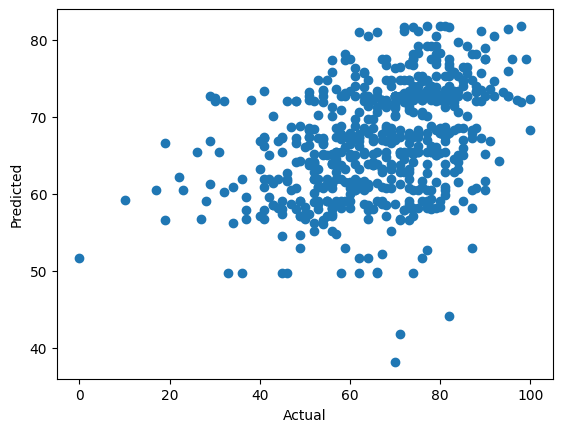

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [27]:
y_pred_df = pd.DataFrame(y_pred, columns=["math_score", "reading_score", "writing_score"])
print("Y_pred data \n",y_pred_df.head(5),"\n")
y_test_df = pd.DataFrame(y_test, columns=["math_score", "reading_score", "writing_score"])
print("Y_test data \n",y_test_df.head(5))

Y_pred data 
    math_score  reading_score  writing_score
0   66.809524      72.736842      72.692708
1   58.039683      71.336634      70.898551
2   68.610080      65.406250      64.535211
3   58.179487      58.725664      56.658730
4   79.702128      75.773810      74.044118 

Y_test data 
      math_score  reading_score  writing_score
521          91             86             84
737          53             66             73
740          80             73             72
660          74             77             73
411          84             83             78
